In [2]:
import numpy as np
import cv2
from imageio import imread
import matplotlib.pyplot as plt

In [78]:
dirname = 'stopsign/'
img_ref = imread(dirname + 'stop-reference.jpg')
img1 = imread(dirname + 'stop1.jpg')
img2 = imread(dirname + 'stop2.jpg')
img3 = imread(dirname + 'stop3.jpg')
img4 = imread(dirname + 'stop4.jpg')
img5 = imread(dirname + 'stop5.jpg')
imgs = [img1, img2, img3, img4, img5]

<Figure size 432x288 with 0 Axes>

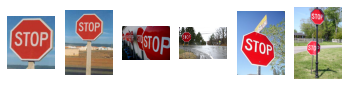

In [63]:
plt.figure()
fig, ax = plt.subplots(1, 6)
ax[0].imshow(img_ref)
ax[0].axis('off')
for i in range(1, 6):
    ax[i].imshow(imgs[i - 1])
    ax[i].axis('off')
plt.show()

In [64]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints_ref, descriptors_ref = sift.detectAndCompute(img_ref, None)

In [65]:
# img1
img = img1
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)

In [66]:
matches = cv2.BFMatcher().knnMatch(descriptors1, descriptors_ref, k=2)

In [67]:
coeff = 0.5

In [68]:
matches_for_plot = [] # good matches
kp_img = []
kp_ref = []
for m1, m2 in matches:
    if m1.distance > coeff * m2.distance:
        continue
    matches_for_plot.append([m1])
    kp1 = keypoints1[m1.queryIdx]
    kp2 = keypoints_ref[m1.trainIdx]
    kp_img.append(kp1)
    kp_ref.append(kp2)

In [69]:
len(keypoints1), len(kp_img)

(573, 74)

In [70]:
keypoints1[0].size, keypoints1[0].pt, keypoints1[0].angle

(2.642656087875366, (6.199623107910156, 260.6299743652344), 266.4943542480469)

In [71]:
kp_img[0].size, kp_img[0].pt, kp_img[0].angle

(2.735447645187378, (82.30899047851562, 82.58668518066406), 47.735321044921875)

In [72]:
kp_ref[0].size, kp_ref[0].pt, kp_ref[0].angle

(2.564664840698242, (17.278919219970703, 65.68575286865234), 46.39166259765625)

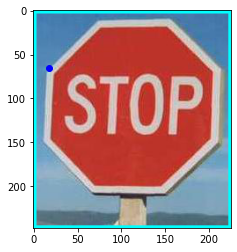

In [81]:
height, width = img_ref.shape[:2]
points = np.stack([
    (0, 0), (width, 0), (width, height), (0, height)
])
vertices  = points.reshape((-1,1,2)).astype(np.int32)
im = cv2.polylines(img_ref.copy(), [vertices], isClosed=True, 
                   color=(0, 255, 255), thickness=5)
plt.imshow(im)
x, y = kp_ref[0].pt
plt.plot(x, y, 'bo')

In [ ]:
def transform_points(points, keypoint1, keypoint_ref):
    pass
    # size scale
    
    # rotation matrix
    
    theta = np.radians(30)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    # translation

In [90]:
theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

In [ ]:
def visualize_bounding_box(points, img):
    pass
    vertices1  = points.reshape((-1,1,2)).astype(np.int32)

    im = cv2.polylines(img1.copy(), [vertices1], isClosed=True, 
                       color=(0, 255, 255), thickness=5)
    
    plt.imshow(im)

In [92]:
points.shape

(4, 2)

In [93]:
points @ R.T

array([[ 47.86722756,  47.15167236],
       [255.69852022, 167.14312512],
       [123.44127451, 396.21939436],
       [-84.39001815, 276.2279416 ]])

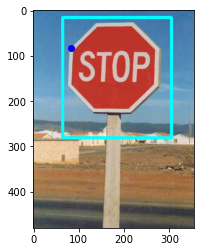

In [89]:
points = np.stack([
    (0, 0), (width, 0), (width, height), (0, height)
]).astype(float)
points *= kp_img[0].size / kp_ref[0].size

points += kp_img[0].pt 
points -= kp_ref[0].pt
vertices1  = points.reshape((-1,1,2)).astype(np.int32)

im = cv2.polylines(img1.copy(), [vertices1], isClosed=True, 
                   color=(0, 255, 255), thickness=5)
plt.imshow(im)
x, y = kp_img[0].pt
plt.plot(x, y, 'bo')

In [12]:
keypoint_loc_img[0]

(82.30899047851562, 82.58668518066406)

In [18]:
matches_for_plot[0][0].queryIdx

71

In [15]:
dir(matches_for_plot[0])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [35]:
pts1 = np.array(keypoint_loc_ref)
pts2 = np.array(keypoint_loc_img)

In [46]:
dir(kp1[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'angle',
 'class_id',
 'convert',
 'octave',
 'overlap',
 'pt',
 'response',
 'size']

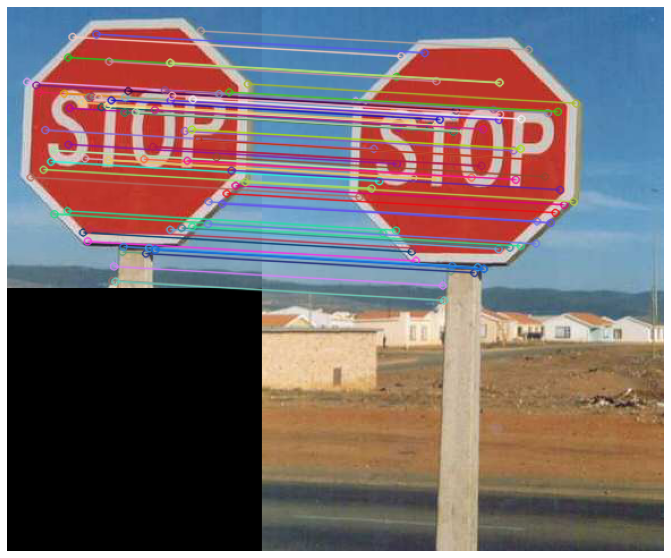

In [36]:
# cv2.drawMatchesKnn expects list of lists as matches.
img_match = cv2.drawMatchesKnn(
    img_ref, keypoints_ref,
    img1, keypoints1,
    matches_for_plot, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(img_match)
plt.show()

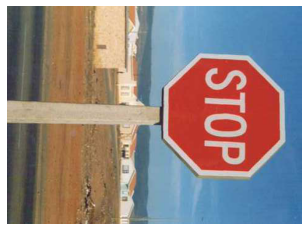

In [44]:
img1rot = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)

plt.axis('off')
plt.imshow(img1rot)
plt.show()

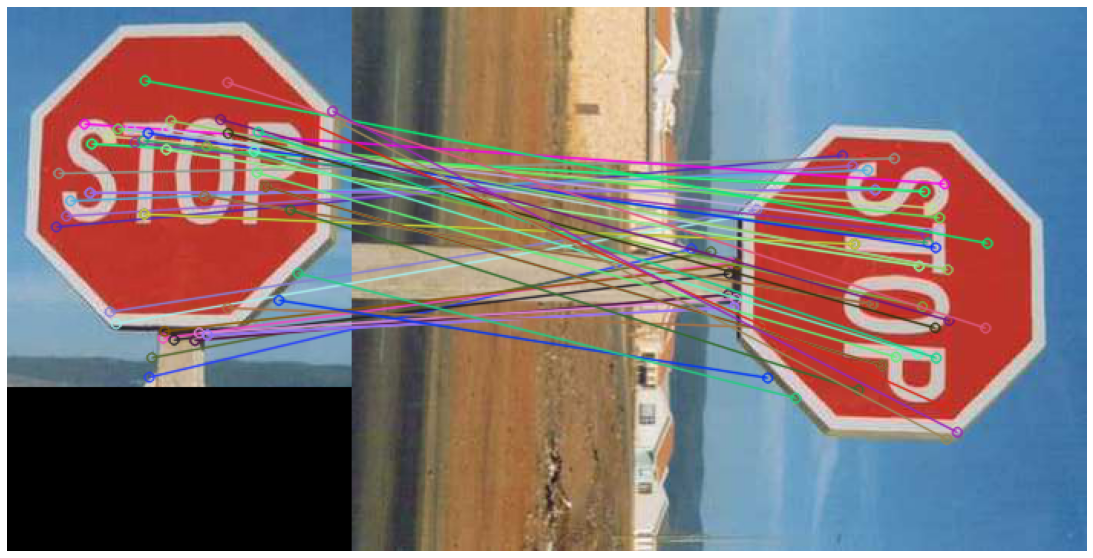

In [45]:
pts1, pts2, matches_for_plot, kp1, kp2 = extract_correspondences(
    img_ref, img1rot, coeff=0.3)
# cv2.drawMatchesKnn expects list of lists as matches.
img_match = cv2.drawMatchesKnn(
    img_ref, kp1,
    img1rot, kp2,
    matches_for_plot, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(img_match)
plt.show()

In [39]:
def extract_correspondences(im1, im2, coeff=0.5):
    # similar to your panorama implementation, can copy/paste
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, desc1 = sift.detectAndCompute(im1, None)
    kp2, desc2 = sift.detectAndCompute(im2, None)
    matches = cv2.BFMatcher().knnMatch(desc1, desc2, k=2)
    
    matches_for_plot = []
    pts1 = []
    pts2 = []
    for m1, m2 in matches:
        if m1.distance > coeff * m2.distance:
            continue
        matches_for_plot.append([m1])
        pt1 = kp1[m1.queryIdx].pt
        pt2 = kp2[m1.trainIdx].pt
        pts1.append(pt1)
        pts2.append(pt2)
    pts1 = np.array(pts1)
    pts2 = np.array(pts2)

    return pts1, pts2, matches_for_plot, kp1, kp2

In [40]:
pts1, pts2, matches_for_plot, kp1, kp2 = extract_correspondences(
    img_ref, img4, coeff=0.3)

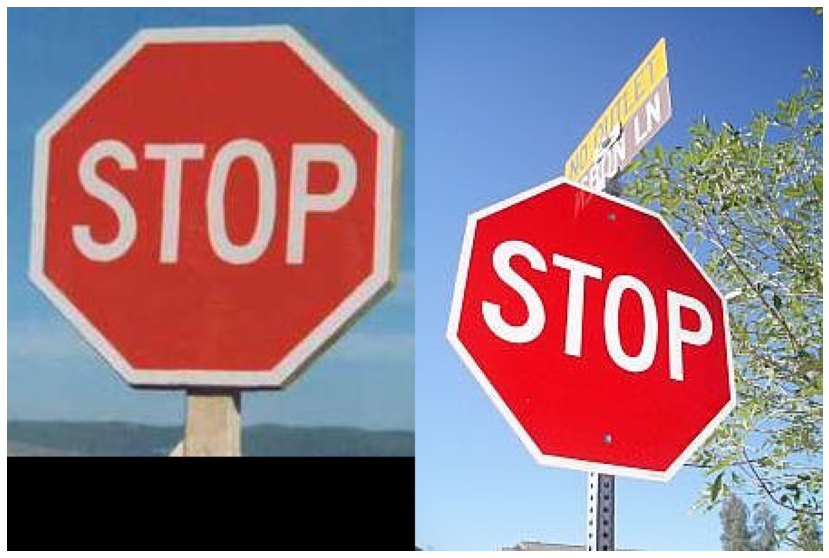

In [41]:
# cv2.drawMatchesKnn expects list of lists as matches.
img_match = cv2.drawMatchesKnn(
    img_ref, kp1,
    img4, kp2,
    matches_for_plot, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(img_match)
plt.show()